# HydroGuard: Predictive Modeling for Safe Drinking Water Quality Classification.

This is a dataset that contains the information we need to get a safe water for consumption. The water quality is based on several factors where the testing element and threshold for danger is included in the features. The Water Quality dataset has a binary target variable called "is_safe" that indicates if the water is safe to drink (1 - safe, 0 - not safe) and a number of numeric attributes that each reflect different water quality parameters. It contains a total of 7999 rows and 21 columns.
| Water Quality Parameter | Threshold for Danger |
|:----------------------- |:---------------------|
| Aluminum                | > 2.8               |
| Ammonia                 | > 32.5              |
| Arsenic                 | > 0.01              |
| Barium                  | > 2                |
| Cadmium                 | > 0.005             |
| Chloramine              | > 4                |
| Chromium                | > 0.1              |
| Copper                  | > 1.3              |
| Fluoride                | > 1.5              |
| Bacteria                | > 0                |
| Viruses                 | > 0                |
| Lead                    | > 0.015            |
| Nitrates                | > 10               |
| Nitrites                | > 1               |
| Mercury                 | > 0.002           |
| Perchlorate             | > 56              |
| Radium                  | > 5               |
| Selenium                | > 0.5             |
| Silver                  | > 0.1             |
| Uranium                 | > 0.3             |

Source: https://www.kaggle.com/datasets/mssmartypants/water-quality/data

### Importing the libraries and loading the dataset

In [1]:
# Importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# Loading it into a dataframe and displaying the first five items
water_quality_data = pd.read_csv('waterQuality.csv')
water_quality_data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


#### Dataset Description, and Preparation

In [3]:
# Checking the number of rows and columns
water_quality_data.shape

(7999, 21)

The dataset contains  7999 rows and 21 columns.

In [4]:
# Checking the summary of the data
water_quality_data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


From this we can infer that the maximum concentraion of aluminium is 5.05 while perchlorate contains like 60.01 concentration. Being the heighest in the dataset.

We have two variables (numerical content) with a datatype of "object" which are ammonia and is_safe. Basically, machine learning models works with numerical datatypes such as float64 and Int64. So we will make conversion of the object variables into a integer datatype.

In [5]:
# Replacing #Num! with NaN so I can properly treat the missing value
water_quality_data.replace('#NUM!', np.nan, inplace=True)

In [6]:
# Checking the data info
water_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [7]:
# Checking for missing values
water_quality_data.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

From this, we have 6 missing values in total. 3 missing values in 'ammonia' variable and also 3 in our target variable 'is_safe'

In [8]:
# For is_safe and ammonia, we will drop the missing values
water_quality_data = water_quality_data.dropna(subset=['is_safe', 'ammonia'])

In [9]:
water_quality_data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

We have suceeded in cleaning the data from missing values.

In [10]:
# Checking for their datatypes
water_quality_data.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

As you can see, we have the object columns which are 'ammonia' and 'is_safe'. We will convert 'ammonia' to a float64 dtype and our target variable 'is_safe' to an int64 dtype so it will be suitable for machine learning.

In [11]:
water_quality_data.is_safe = water_quality_data.is_safe.astype(int)

water_quality_data.ammonia = pd.to_numeric(water_quality_data.ammonia, errors='coerce')

In [12]:
water_quality_data.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

We have successfully converted to the appropraite dtypes.

is_safe
0    7084
1     912
Name: count, dtype: int64


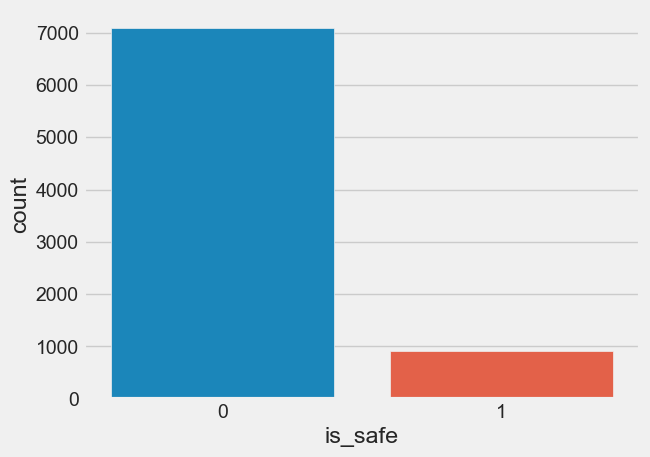

In [13]:
sns.countplot(water_quality_data, x="is_safe")
print(water_quality_data.is_safe.value_counts())

This is a clear case of imbalanced class. We have an excess of 7000 not safe and below 1000 safe for drinking. We will have to balance it with a RandomOverSampler method after splitting.

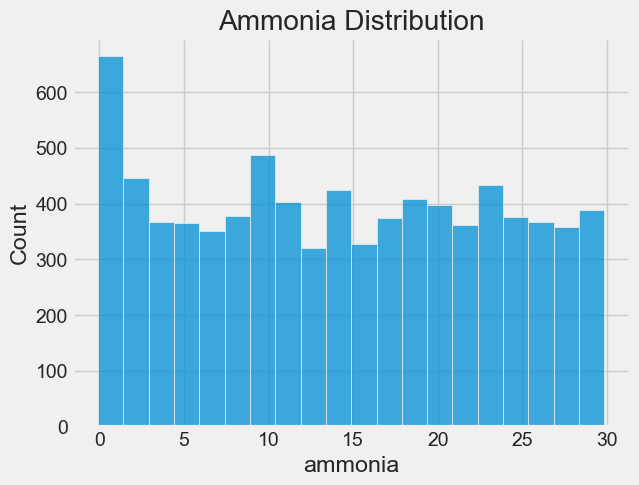

In [14]:
sns.histplot(water_quality_data.ammonia)
plt.title("Ammonia Distribution")
plt.show()

Noticed how it is skewed to the right. We have more ammonia content of value of 0 to 3 in the dataset

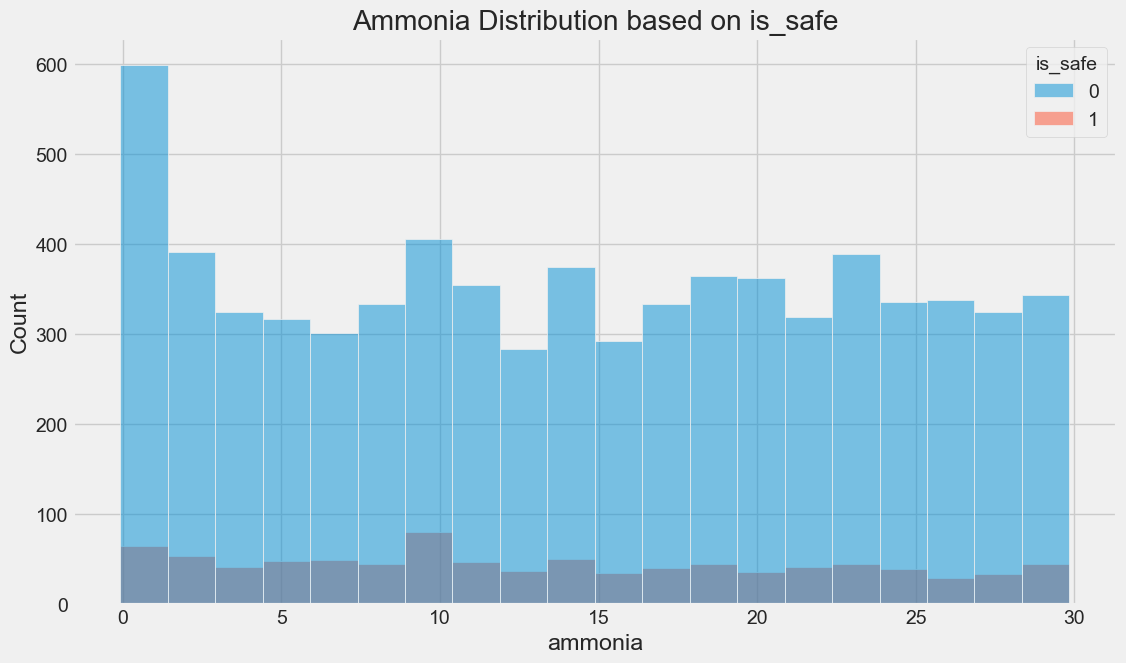

In [15]:
plt.figure(figsize=(12, 7))
plt.title("Ammonia Distribution based on is_safe")
sns.histplot(x="ammonia", hue="is_safe", data=water_quality_data)
plt.show()

The distribution shows that ammonia content of over 10 among the target audience are more dangerous and makes water unsafe.

### Data Preprocessing

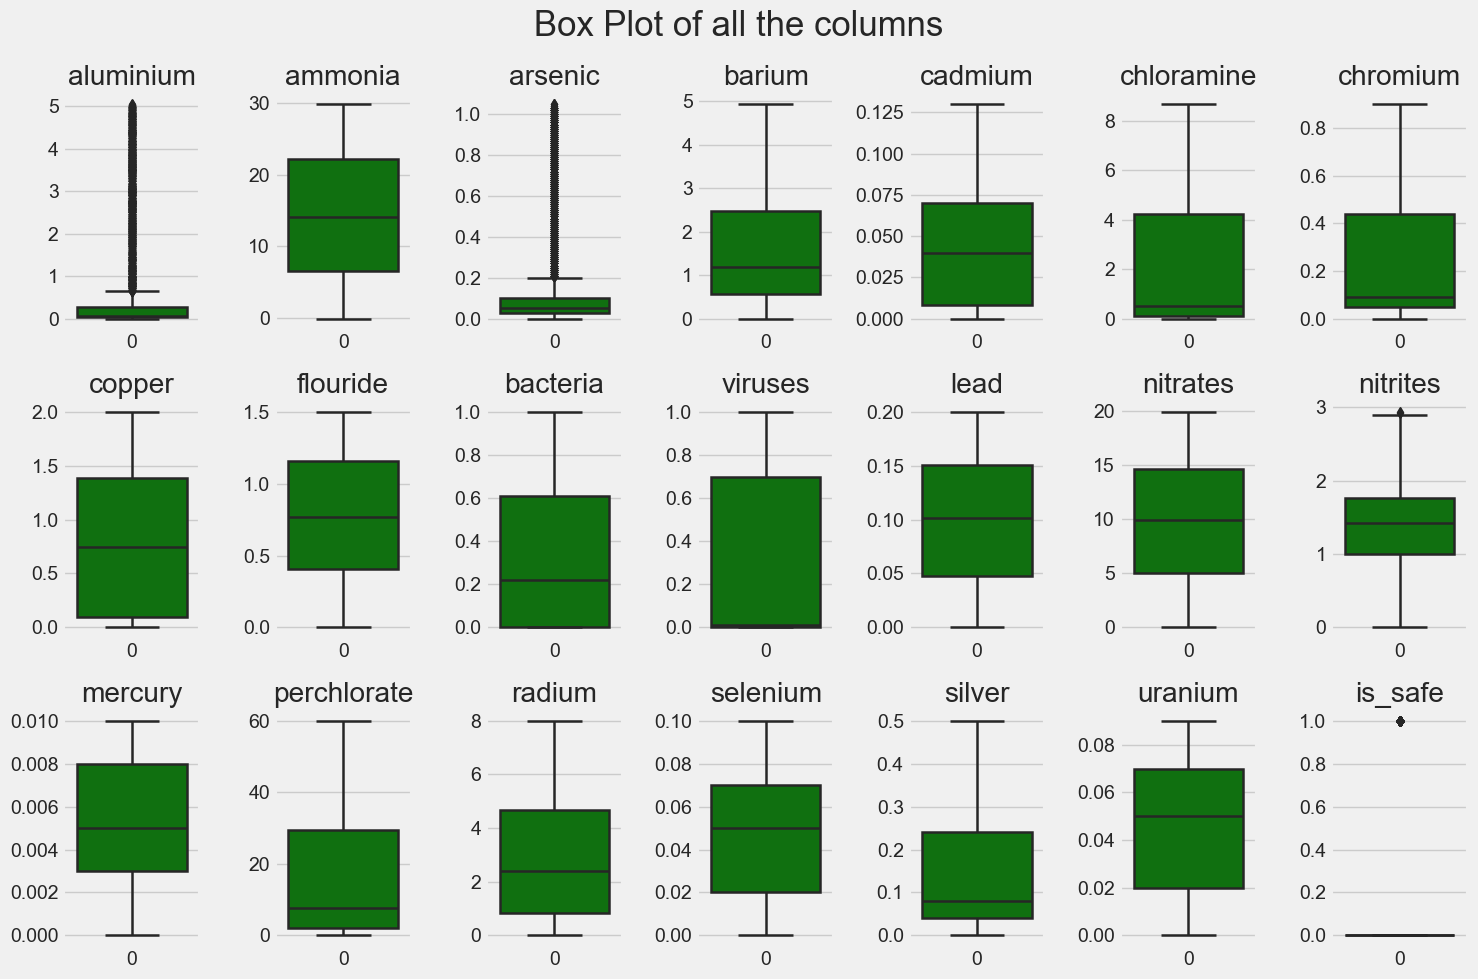

In [16]:
# Checking outliers for elimination using boxplot
fig, axes = plt.subplots(3, 7, figsize=(15, 10))
fig.subplots_adjust(wspace=0.4)

columns = water_quality_data.columns
for x in range(3):
    for y in range(7):
        if x * 7 + y < len(columns):
            col_name = columns[x * 7 + y]
            ax = axes[x, y]
            ax.set_title(col_name)
            sns.boxplot(data=water_quality_data[col_name], ax=ax, color='green', linewidth=1.8)
            ax.set_xlabel("")

plt.suptitle("Box Plot of all the columns", fontsize=25)
plt.tight_layout()
plt.show()

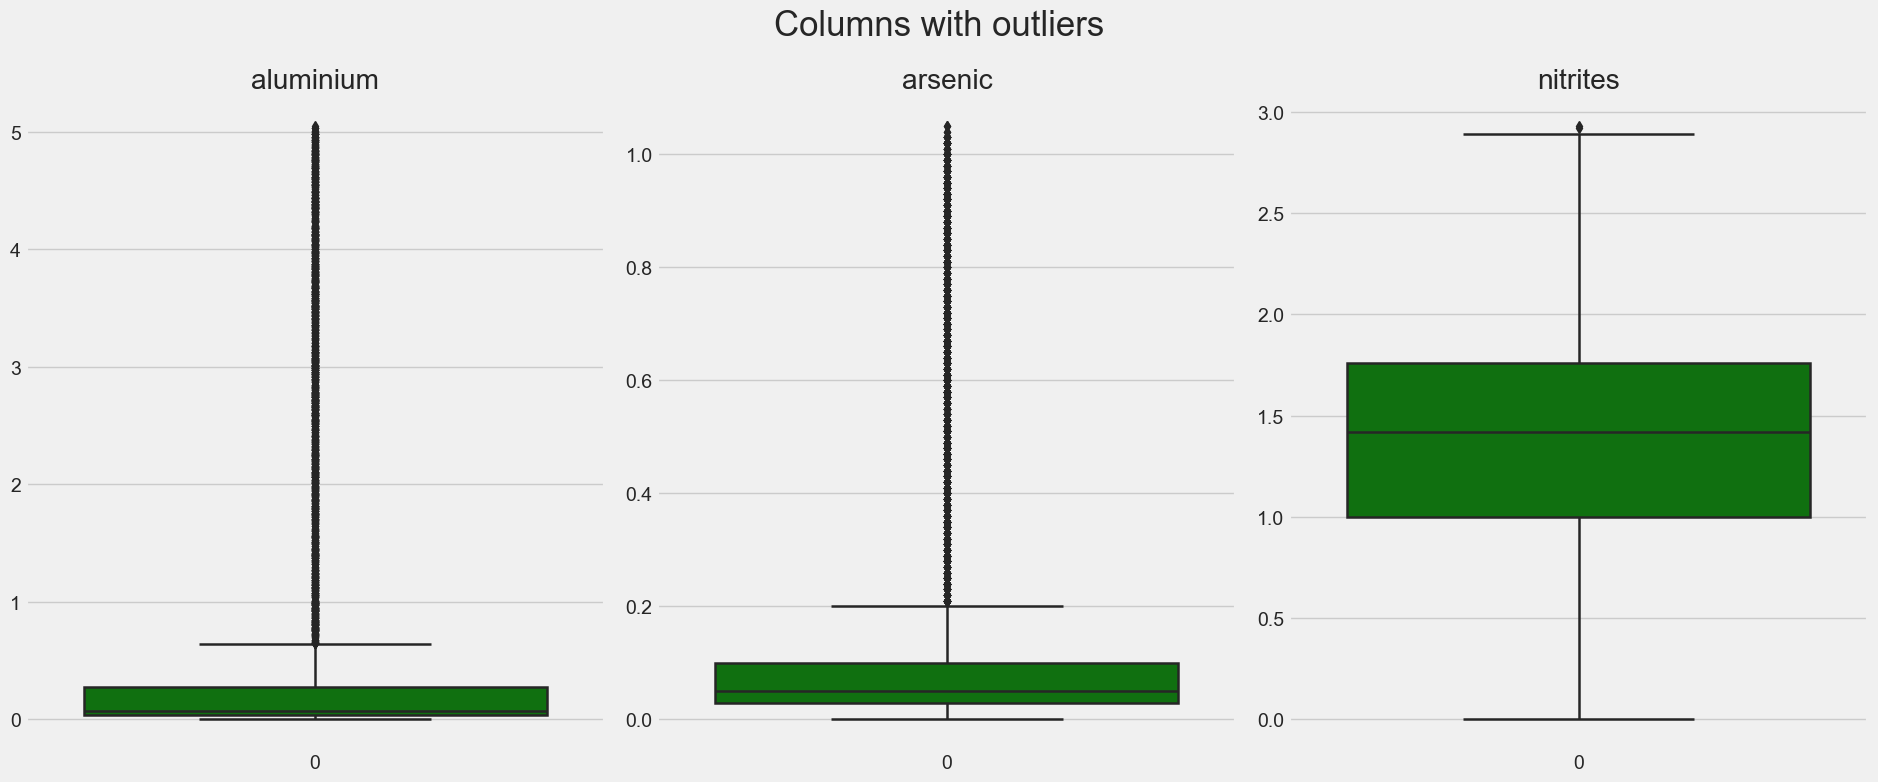

In [17]:
# Displaying the columns with outliers
outlier_columns = ['aluminium', 'arsenic', 'nitrites']

fig, axes = plt.subplots(1, 3, figsize=(19, 8))

for x, col in enumerate(outlier_columns):
    ax = axes[x]
    ax.set_title(col)
    sns.boxplot(data=water_quality_data[col], ax=ax, color='green', linewidth=1.8)
    ax.set_xlabel("")

plt.suptitle("Columns with outliers", fontsize=25)
plt.tight_layout()
plt.show()

On our boxplot visuals, we can see three columns has outliers and its needs to be trimmed. The three columns are 'aluminium', 'arsenic', and 'nitrates'

In [18]:
# First, we will create a function to remove the outliers using interquartile range(IQR) method setting a threshold of 1.5
def iqr_removal(column):
    first_quart = column.quantile(0.25)
    third_quart = column.quantile(0.75)
    iq_range = third_quart - first_quart
    low_bound = first_quart - 1.0 * iq_range
    up_bound = third_quart + 1.0 * iq_range
    return column[(column >= low_bound) & (column <= up_bound)]

In [19]:
# Then, we will use the function to remove the outliers in the identified columns
outliers_col = ['aluminium', 'arsenic', 'nitrites']
outlier_cleaned_data = water_quality_data.copy()

for x in outliers_col:
    outlier_cleaned_data[x] = iqr_removal(outlier_cleaned_data[x])

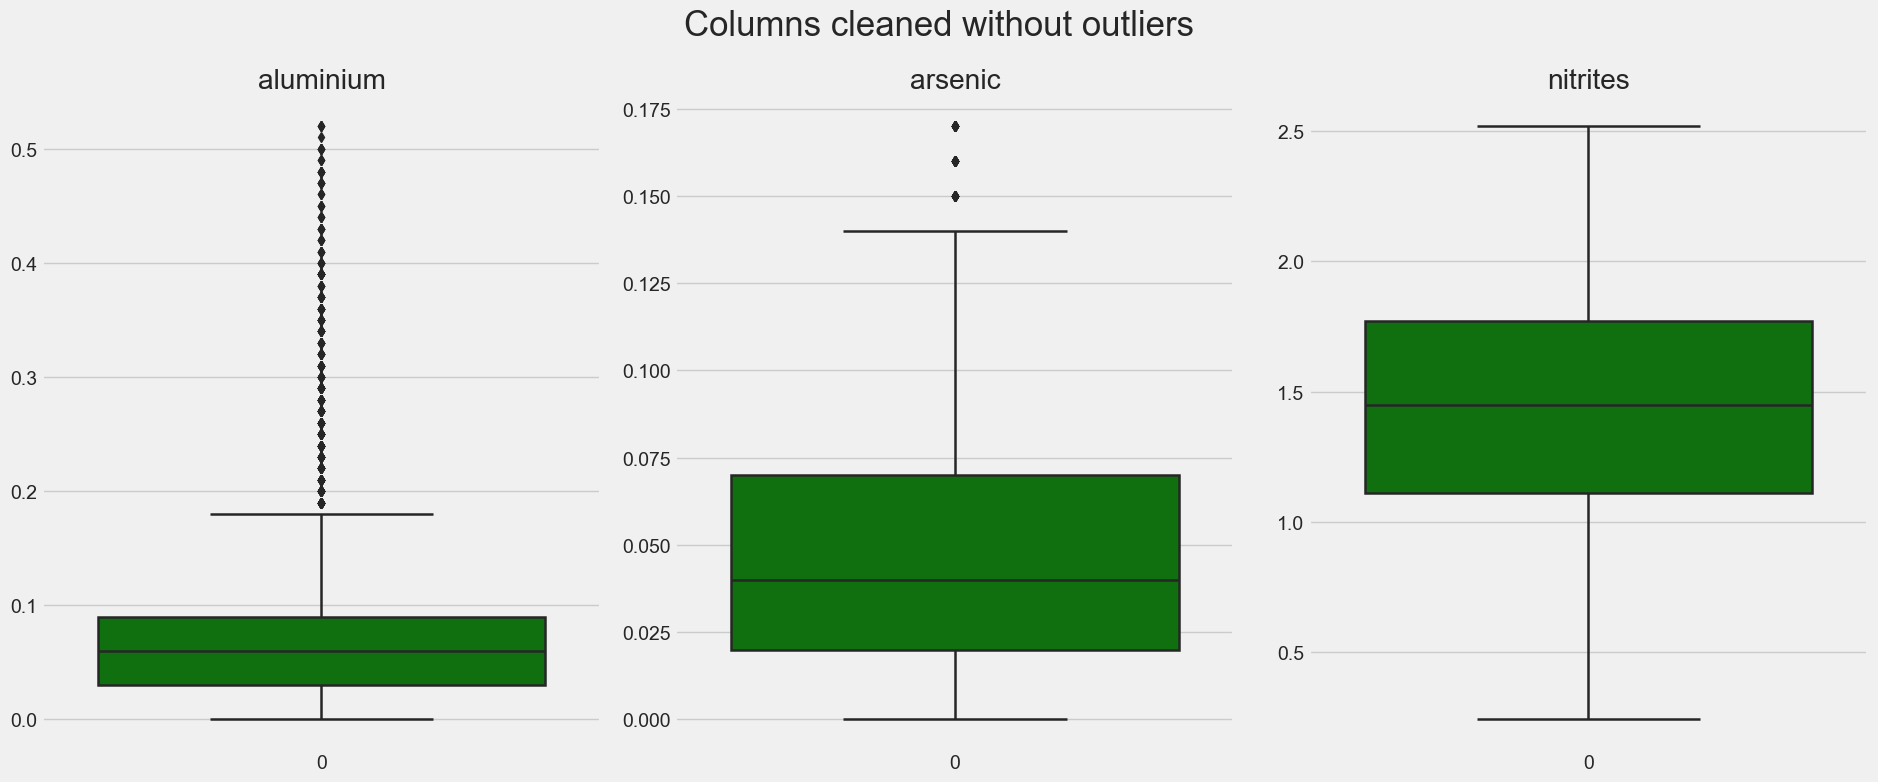

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(19, 8))

for x, col in enumerate(outlier_columns):
    ax = axes[x]
    ax.set_title(col)
    sns.boxplot(data=outlier_cleaned_data[col], ax=ax, color='green', linewidth=1.8)
    ax.set_xlabel("")

plt.suptitle("Columns cleaned without outliers", fontsize=25)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='median')
outlier_cleaned_data_imputed = simple_imputer.fit_transform(outlier_cleaned_data)

In [22]:
outlier_cleaned_data = pd.DataFrame(outlier_cleaned_data_imputed, columns=outlier_cleaned_data.columns)

In [23]:
outlier_cleaned_data.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7991,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7992,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7993,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7994,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,1.45,0.000,0.00,0.00,0.00,0.00,0.00,1.0
7995,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0


#### Feature Selection

In [24]:
# Lets define our features and class
X = outlier_cleaned_data.drop(columns=['is_safe'])
y = outlier_cleaned_data['is_safe']

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
variance_selector = VarianceThreshold(threshold=1)
X_train_fs = variance_selector.fit_transform(X)

print(f"Out of {X.shape[1]} features, {X.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

Out of 20 features, 14 features have been removed, 6 features remain


<Axes: >

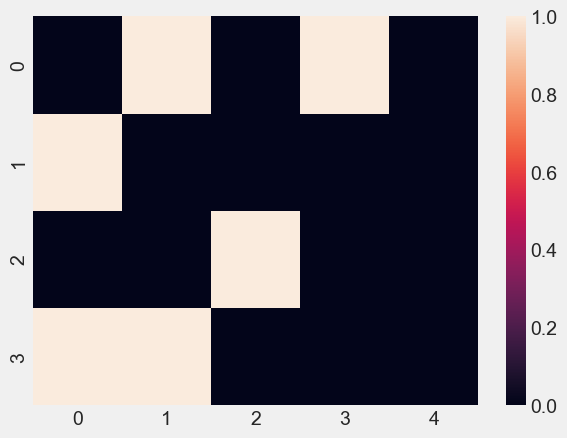

In [27]:
# Visualizing features dropped
selected_features = variance_selector.get_support()
selected_features = selected_features.reshape(4,5)

sns.heatmap(selected_features,cmap='rocket')

#### Scaling with StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X_train_fs)

#### Balancing the target class

In [29]:
# Using RandomOverSampler method to balance the class
from imblearn.over_sampling import RandomOverSampler

is_safe
1.0    7084
0.0    7084
Name: count, dtype: int64


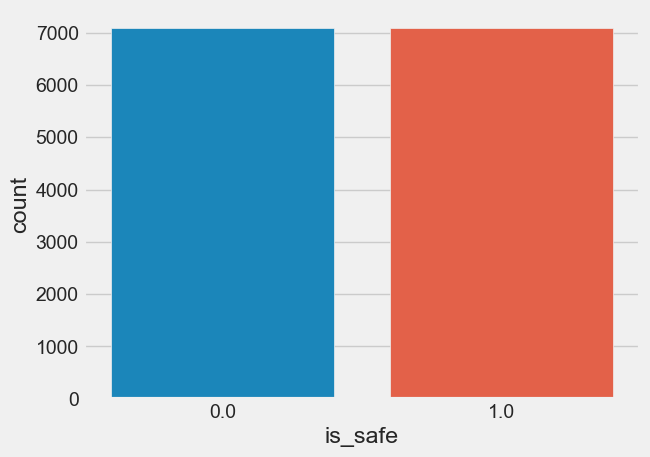

In [30]:
resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_scaled, y)

sns.countplot(x = y_train_oversampled)
print(y_train_oversampled.value_counts())

Now we have balanced our target variable to equal numbers. The safe and not safe category now contains 7084 observations each. We balanced the data in the training set in order to avoid leakage into the testing set.

### Model Building

#### Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, test_size = 0.2, random_state = 0)

In [33]:
print("Training dataset:", X_train.shape, y_train.shape)
print("Testing dataset:", X_test.shape, y_test.shape)

Training dataset: (11334, 6) (11334,)
Testing dataset: (2834, 6) (2834,)


#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
decision_tree = DecisionTreeClassifier(random_state=0)

In [36]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [37]:
print("Predicted values")
print(y_pred[0:20])

Predicted values
[0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]


In [38]:
print("Actual values")
print(y_test[0:20].values)

Actual values
[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]


In [39]:
accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", c_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.9199011997177134

Confusion Matrix:
 [[1163  218]
 [   9 1444]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      1381
         1.0       0.87      0.99      0.93      1453

    accuracy                           0.92      2834
   macro avg       0.93      0.92      0.92      2834
weighted avg       0.93      0.92      0.92      2834



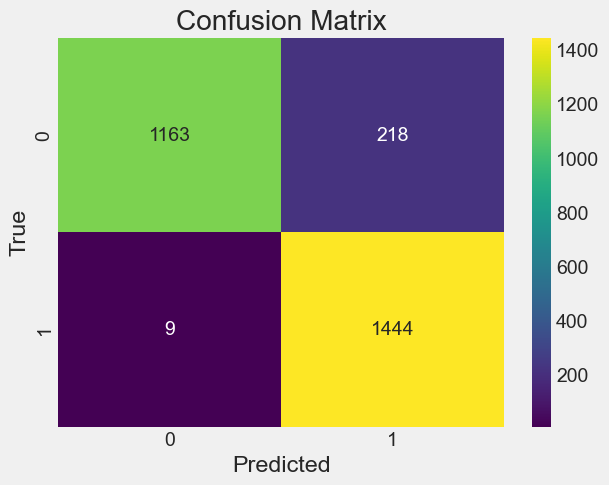

In [40]:
ax = sns.heatmap(c_matrix, cmap = "viridis", annot = True, fmt = "d")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [41]:
# Computing the ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [42]:
# Calculating the AUC
cal_auc = auc(fpr, tpr)

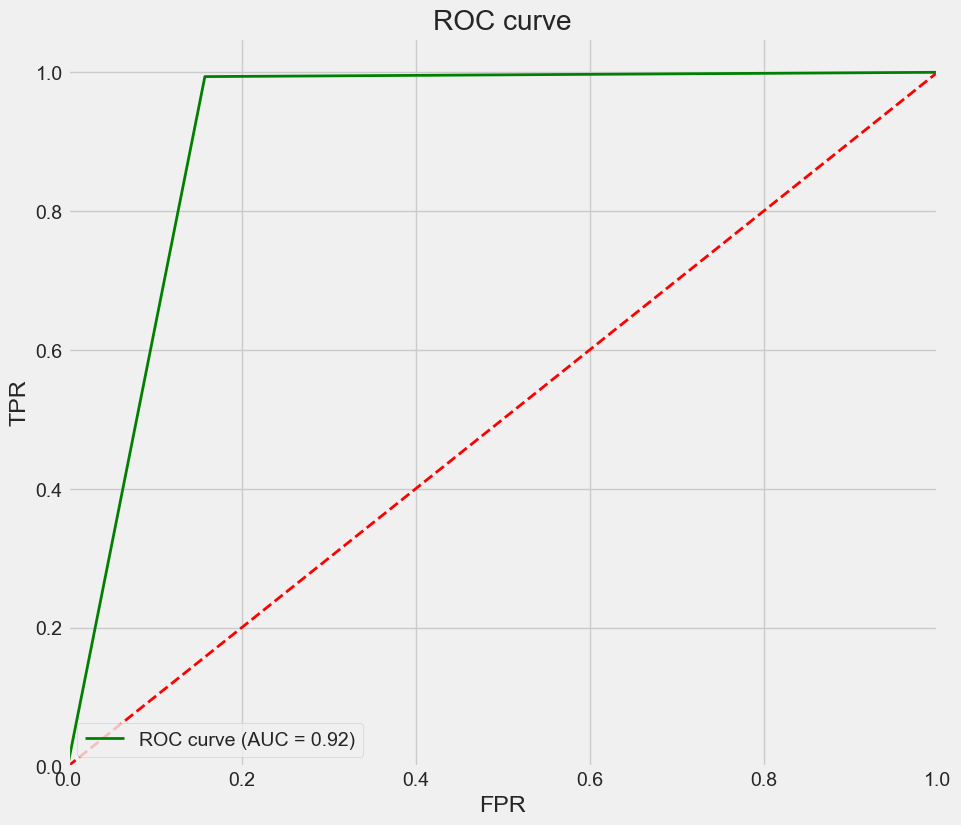

In [43]:
# Plot ROC curve
plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {cal_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
plt.show()

#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forest = RandomForestClassifier()

In [46]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [47]:
print("Predicted values")
print(y_pred[0:20])

Predicted values
[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]


In [48]:
print("Actual values")
print(y_test[0:20].values)

Actual values
[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.]


In [49]:
accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", c_matrix)
print("\nClassification Report:\n", report)

Accuracy: 0.9481298517995765

Confusion Matrix:
 [[1241  140]
 [   7 1446]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1381
         1.0       0.91      1.00      0.95      1453

    accuracy                           0.95      2834
   macro avg       0.95      0.95      0.95      2834
weighted avg       0.95      0.95      0.95      2834



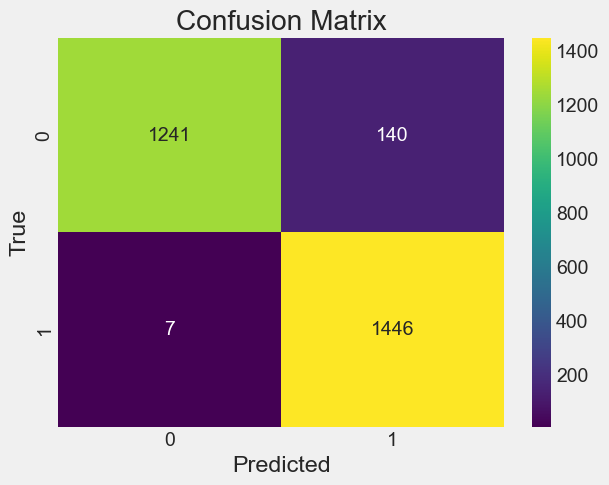

In [50]:
ax = sns.heatmap(c_matrix, cmap = "viridis", annot = True, fmt = "d")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [51]:
# Computing the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [52]:
# Calculating the AUC
cal_auc = auc(fpr, tpr)

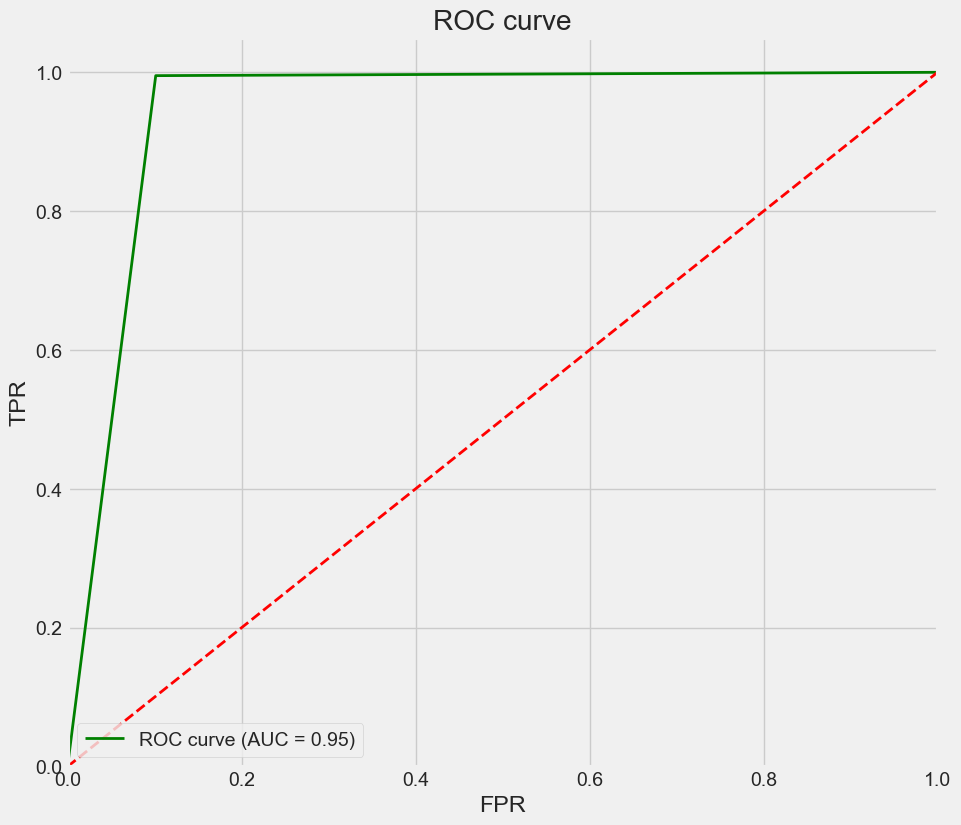

In [53]:
# Plot ROC curve
plt.figure(figsize=(10, 9))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {cal_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc="lower left")
plt.show()